1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


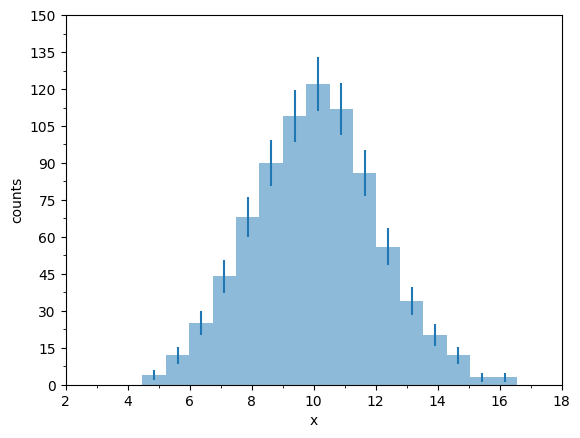

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy.stats import norm
import scipy

mu = 3
sigma = 1
x = np.random.normal(loc=10, scale=2, size=800)
fig, ax = plt.subplots(1, 1)
n, bins, _ = ax.hist(x, bins=16, alpha=0.5)
# n = bin high
# bins = all bin edge, lower and upper included

# set labels
ax.set_xlabel("x")
ax.set_ylabel("counts")

# set limits
plt.xlim([2, 18])
plt.ylim([0, 150])

# set ticks
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(15))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# add error bars
mid = 0.5 * (bins[1:] + bins[:-1])
plt.errorbar(mid, n, yerr=np.sqrt(n), fmt='none')
plt.show()

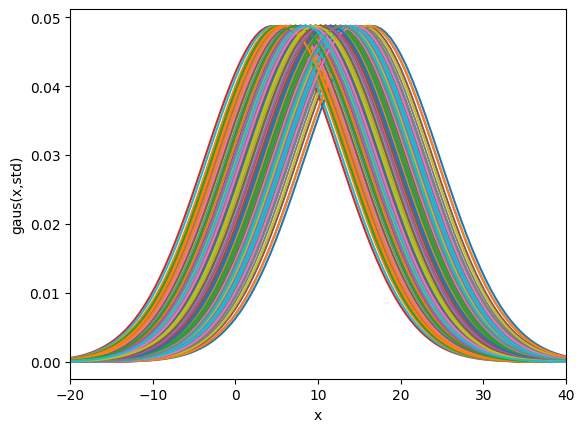

In [2]:
t = np.linspace(-20, 40, 100)
std_err = 1.06 * x.std() * np.power(len(x), 1 / 5)
gaus = []
for mean in x:
    gaus.append(norm.pdf(t, loc=mean, scale=std_err))

for g in gaus:
    plt.plot(t, g)

plt.xlim(-20, 40)

# labels
plt.xlabel("x")
plt.ylabel("gaus(x,std)")

plt.show()



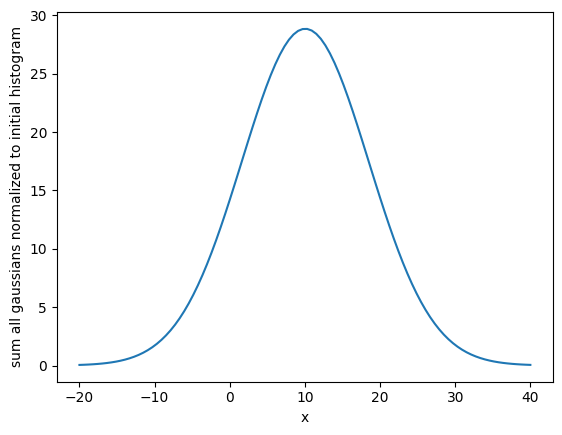

In [6]:
tot_gaus = [0] * len(gaus[0])
for g in gaus:
    tot_gaus = tot_gaus + g

# should be 800, all gaussians are normalized!
integral = scipy.integrate.trapz(tot_gaus, dx=(t.max() - t.min()) / 100)

# histogram integral
bin_width = bins[1] - bins[0]
hist_integral = bin_width * sum(n)
tot_gaus = tot_gaus * hist_integral / integral

plt.plot(t, tot_gaus)
plt.xlabel("x")
plt.ylabel("sum all gaussians normalized to initial histogram")

plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2023-04-25 20:55:32--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Caricato certificato CA "/etc/ssl/certs/ca-certificates.crt"

Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2023-04-25 20:55:33--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc9e1f6311b489fcb0b460fb553c.dl.dropboxusercontent.com/cd/0/inline/B63QTbfdIkA79nqmPozkQ5sUCKEeVDQH-rKHvRPLh_YZhzkzMXmjWTsENnCVrlUYxqpkoKeq5KJ0f3rPIf2IlG8PmnLezHl8CkNjL9jDVjlWfJ_zjHlhE1D5jNkigwEpltczXESHRobhJ1Trs3KH0TxdyMPSGdZ57IeM5O1F1vGVdQ/file# [segue]
--2023-04-25 20:55:34--  https:/

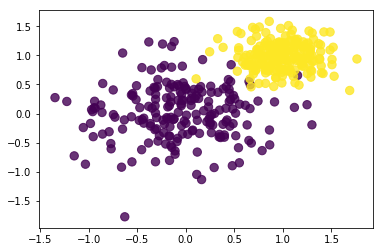

In [7]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')


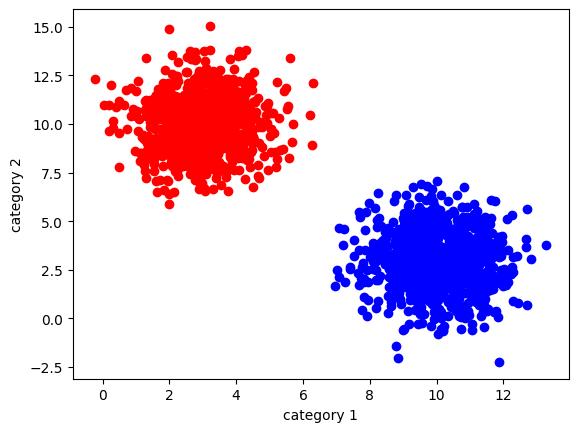

In [8]:
import numpy as np
import matplotlib.pyplot as plt


def DateGenerator(mean1, mean2, sigma1, sigma2, n_values):
    """generats the 2D sample"""
    mean = [mean1, mean2]
    cov = [[sigma1, 0], [0, sigma2]]
    dataset = np.random.multivariate_normal(mean, cov, n_values)
    return dataset.T


sample1 = DateGenerator(3, 10, 1, 2, 1000)
sample2 = DateGenerator(10, 3, 1, 2, 1000)
plt.scatter(sample1[0], sample1[1], marker='o', color="red")
plt.scatter(sample2[0], sample2[1], marker='o', color="blue")

plt.xlabel("category 1")
plt.ylabel("category 2")

plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

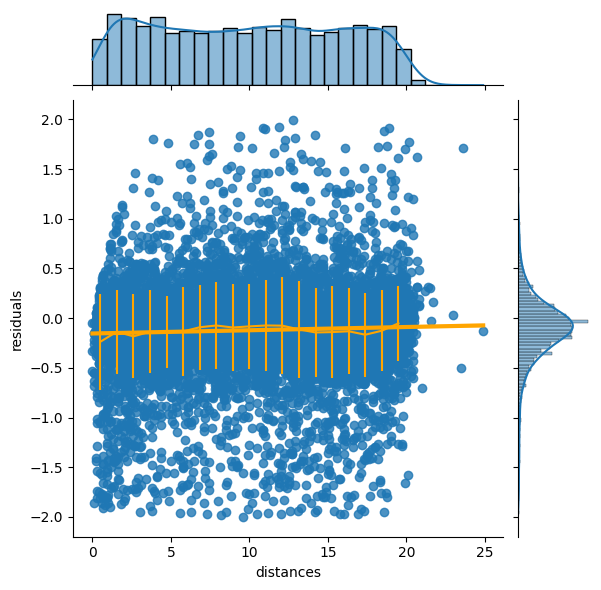

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import matplotlib.pyplot as plt

data = np.load("./residuals_261.npy", allow_pickle=True)
df = pd.DataFrame(data.item())
df = df[abs(df["residuals"]) < 2]
result = scipy.stats.linregress(df["distances"], df["residuals"])


# fill x array
x = np.linspace(0, 19, 19) + 0.5
bin_width = x[1] - x[0]
y = [0] * len(x)
yerr = [0] * len(x)

for i in range(0, len(x)):
    tmp_df = df[abs(df["distances"] - x[i]) < bin_width / 2]
    y[i] = tmp_df["residuals"].mean()
for i in range(0, len(x)):
    tmp_df = df[abs(df["distances"] - x[i]) < bin_width / 2]
    yerr[i] = tmp_df["residuals"].std()

sns.jointplot(x="distances",
              y="residuals",
              data=df,
              kind="reg",
              line_kws={
                  'color': 'orange',
                  "lw": 3
              })
plt.errorbar(x, y, yerr=yerr, color='orange')

plt.show()